###Supervised Machine Learning exercise

Buisness Problem: Factors affecting Sales of houses

Here we know our target variable which is Sales and it is continuos. So we use regression model

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/Users/yshaik/Downloads/1684675248assignment/house_price.csv")
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.count # df has 1460 rows x 81 columns

<bound method DataFrame.count of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

<AxesSubplot:xlabel='MSSubClass', ylabel='Count'>

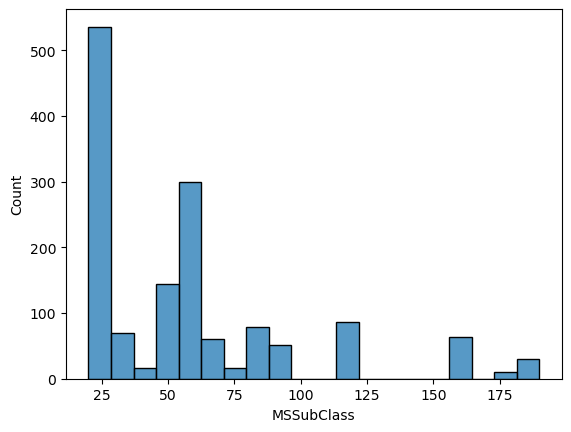

In [5]:
sns.histplot(df["MSSubClass"])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

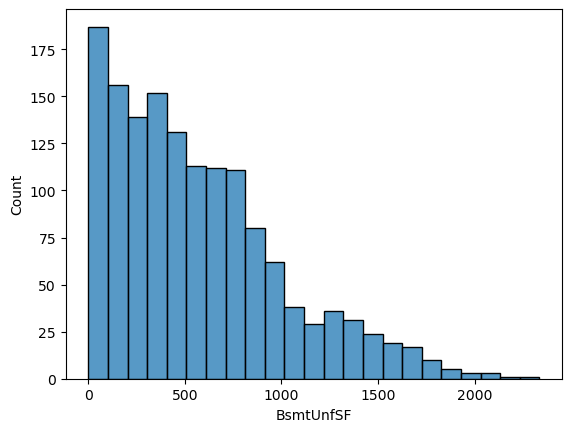

In [6]:
sns.histplot(df["BsmtUnfSF"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

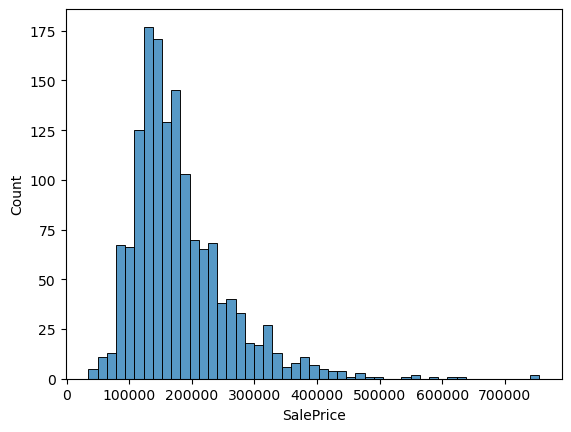

In [7]:
sns.histplot(df["SalePrice"])

In [8]:
df.shape

(1460, 81)

From above data i can infer the following:
has 1460 rows and 81 columns
data available is untill 2010. 
Has 38 numeric columns out of 81(81-38=43).43 categorical columns(df.dtypes[df.dtypes=="object"].count())
[Id	MSSubClass	LotFrontage	LotArea	OverallQual	OverallCond	YearBuilt	YearRemodAdd	MasVnrArea	BsmtFinSF1	...	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	MiscVal	MoSold	YrSold	SalePrice]


EDA: Univariant(Cat,num),Bivariant(Cat-Cat,Cat-Num,Num-Num)

1.Cat Data Analysis
######################################################################

In [9]:
df.dtypes[df.dtypes=="object"]

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [10]:
cat_cols=df.columns[df.dtypes=="object"]

for i in cat_cols:
    print("\n",df[i].value_counts())


 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 Pave    1454
Grvl       6
Name: Street, dtype: int64

 Grvl    50
Pave    41
Name: Alley, dtype: int64

 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Ne

######Numerical Data Ananlysis###################################################

In [11]:
# since Id is disctinct col, drop it
#df1=df["Id"].drop()
df.drop("Id",axis=1,inplace=True)
df1=df
df1.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [12]:
num_cols=df.columns[df.dtypes!="object"]
for i in num_cols:
    print(i,"\n","Minimum:",df[i].min(),"Max:",df[i].max(),"Mean:",df[i].mean(),"Median:",df[i].median(),"Std:",df[i].std())

MSSubClass 
 Minimum: 20 Max: 190 Mean: 56.897260273972606 Median: 50.0 Std: 42.30057099381035
LotFrontage 
 Minimum: 21.0 Max: 313.0 Mean: 70.04995836802665 Median: 69.0 Std: 24.284751774483183
LotArea 
 Minimum: 1300 Max: 215245 Mean: 10516.828082191782 Median: 9478.5 Std: 9981.264932379147
OverallQual 
 Minimum: 1 Max: 10 Mean: 6.0993150684931505 Median: 6.0 Std: 1.3829965467415923
OverallCond 
 Minimum: 1 Max: 9 Mean: 5.575342465753424 Median: 5.0 Std: 1.1127993367127367
YearBuilt 
 Minimum: 1872 Max: 2010 Mean: 1971.267808219178 Median: 1973.0 Std: 30.202904042525265
YearRemodAdd 
 Minimum: 1950 Max: 2010 Mean: 1984.8657534246574 Median: 1994.0 Std: 20.645406807709396
MasVnrArea 
 Minimum: 0.0 Max: 1600.0 Mean: 103.68526170798899 Median: 0.0 Std: 181.06620658721818
BsmtFinSF1 
 Minimum: 0 Max: 5644 Mean: 443.6397260273973 Median: 383.5 Std: 456.09809084092456
BsmtFinSF2 
 Minimum: 0 Max: 1474 Mean: 46.54931506849315 Median: 0.0 Std: 161.31927280654057
BsmtUnfSF 
 Minimum: 0 Max: 2

In [13]:
#details of the house for minimum sales price
df1[df1["SalePrice"]==df1["SalePrice"].min()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [14]:
#details of the house for max sales price
df[df["SalePrice"]==df["SalePrice"].max()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


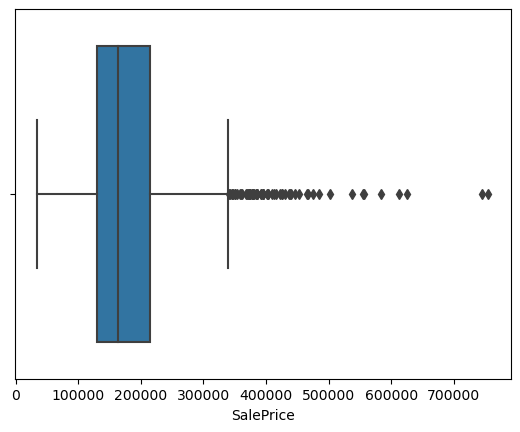

In [15]:
sns.boxplot(df["SalePrice"])
plt.show()

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


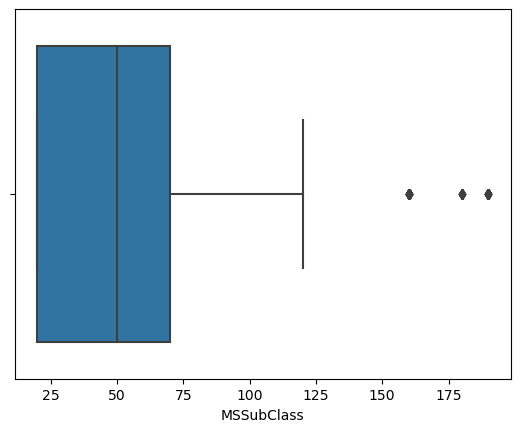

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


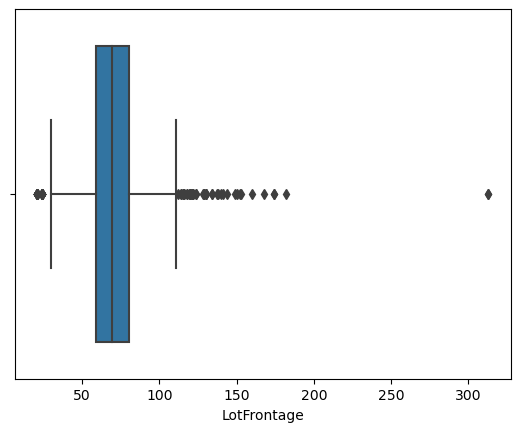

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


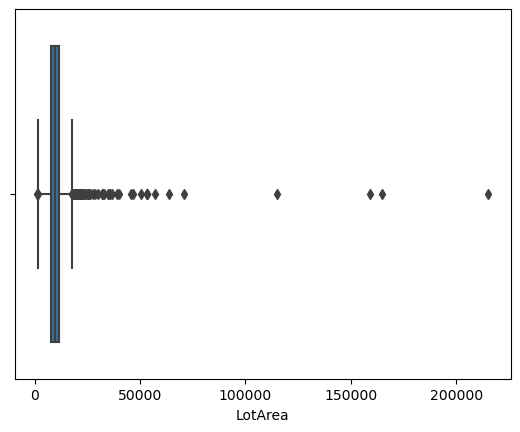

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


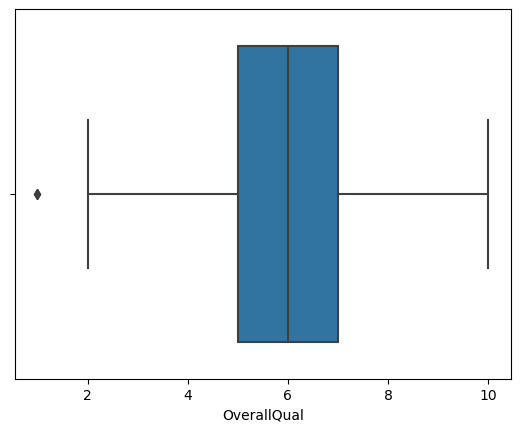

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


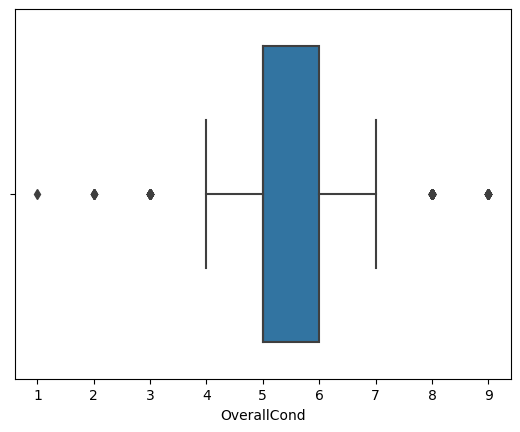

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


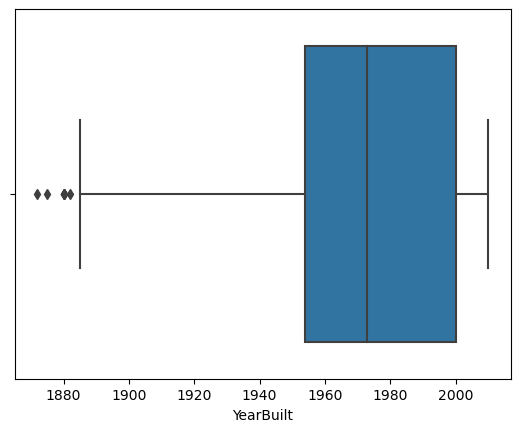

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


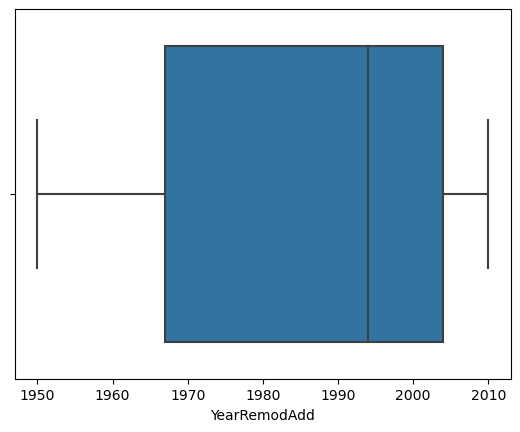

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


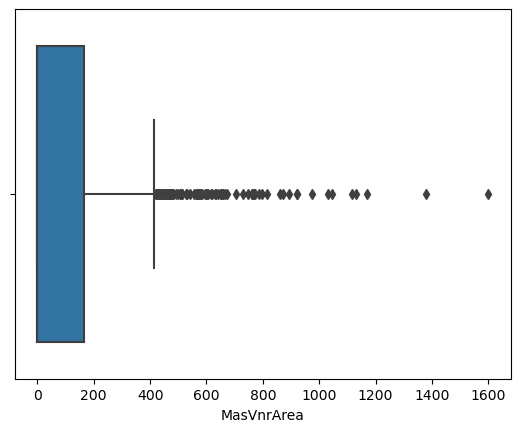

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


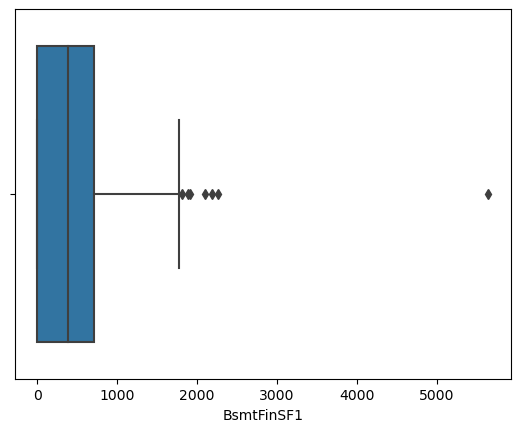

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


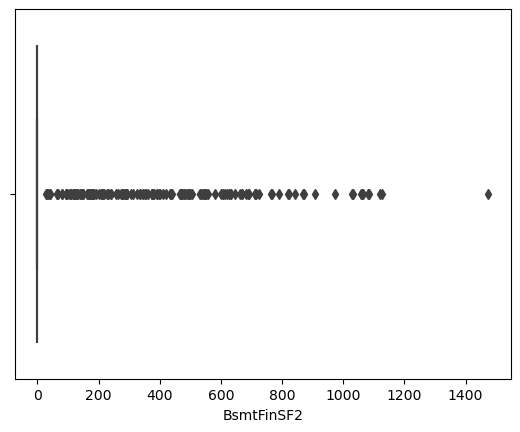

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


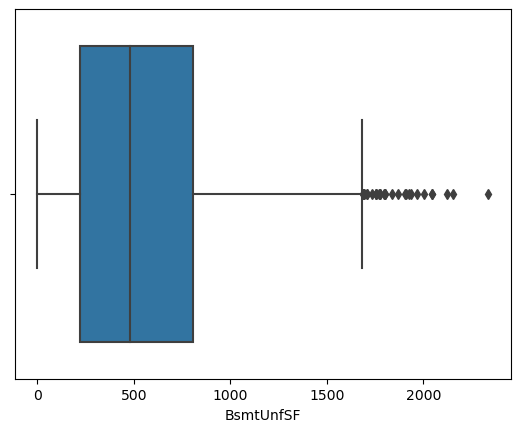

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


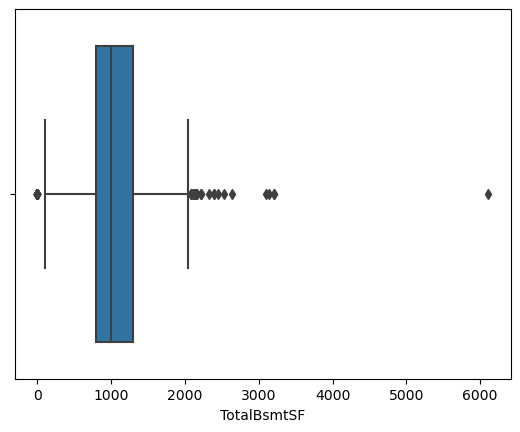

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


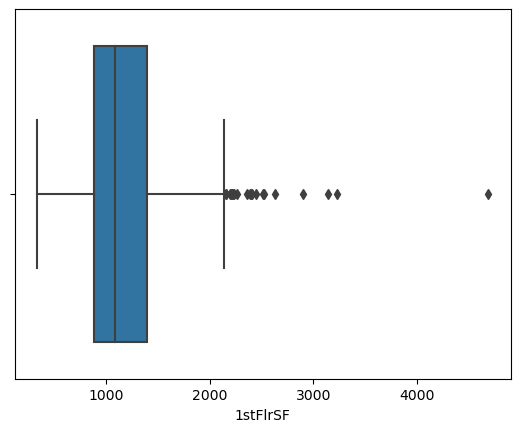

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


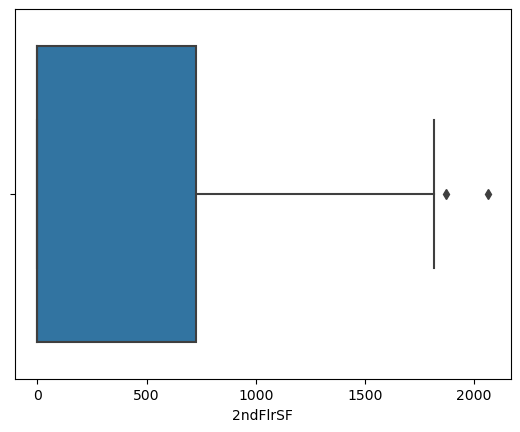

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


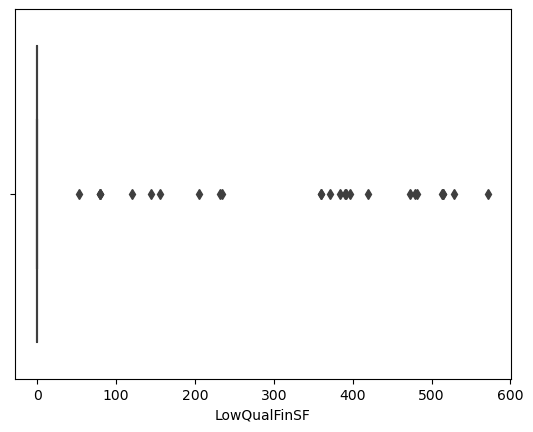

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


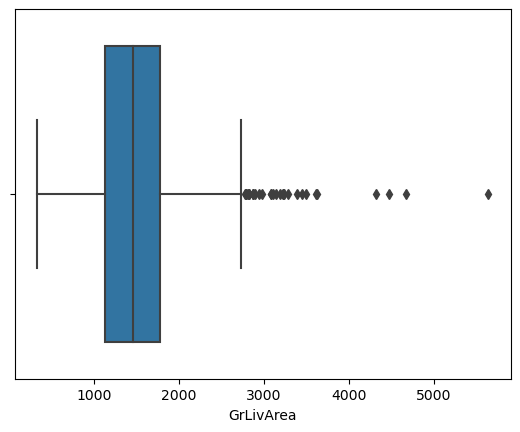

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


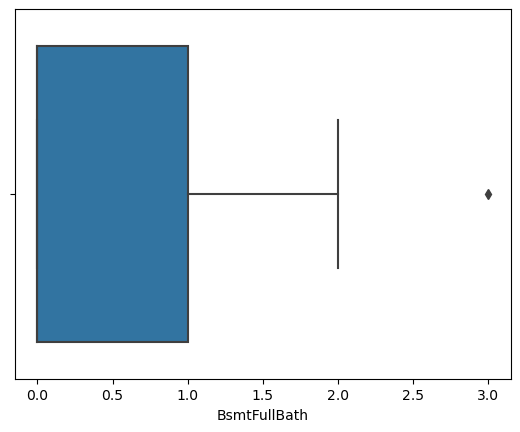

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


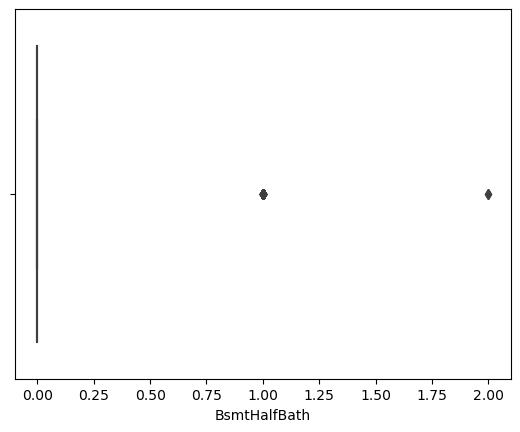

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


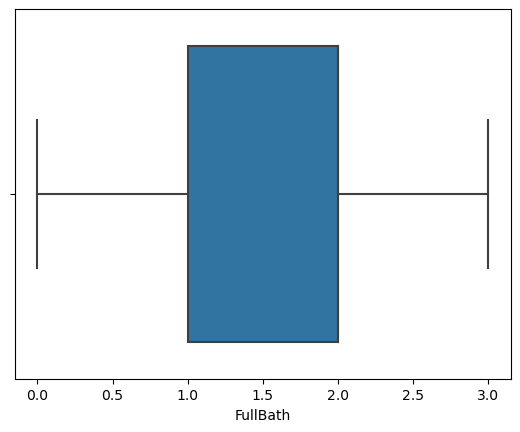

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


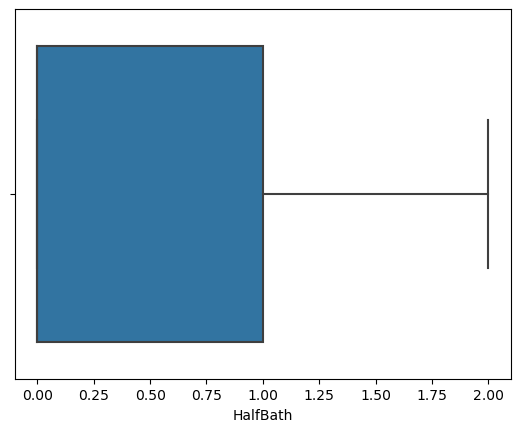

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


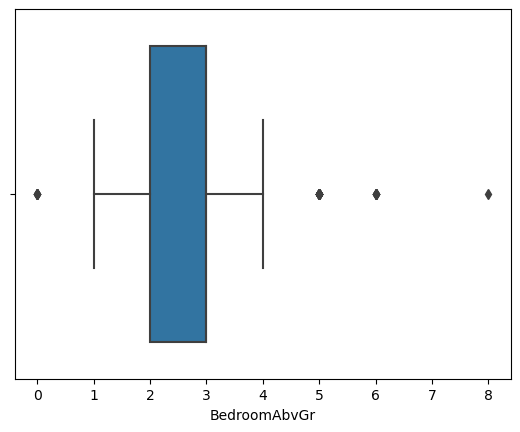

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


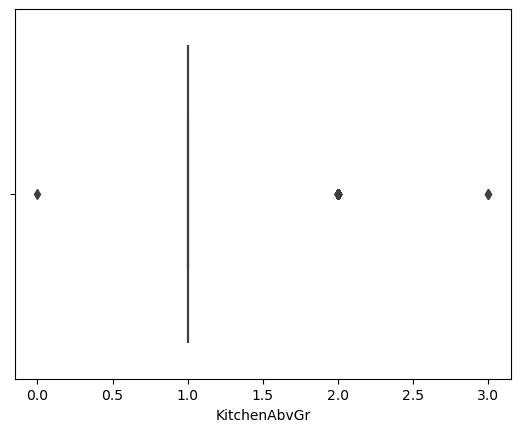

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


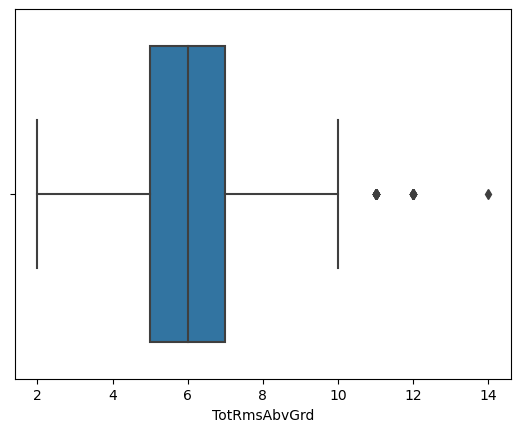

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


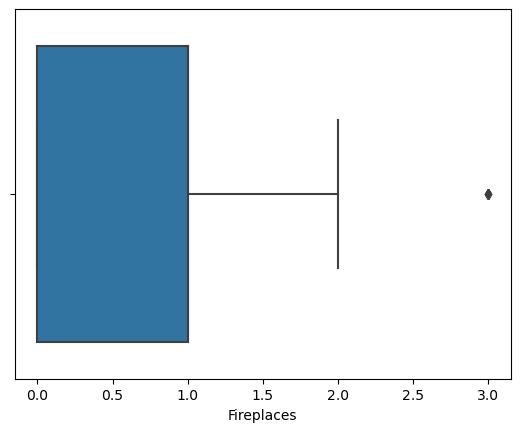

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


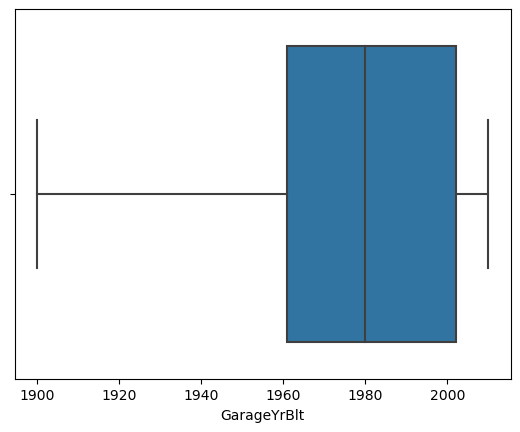

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


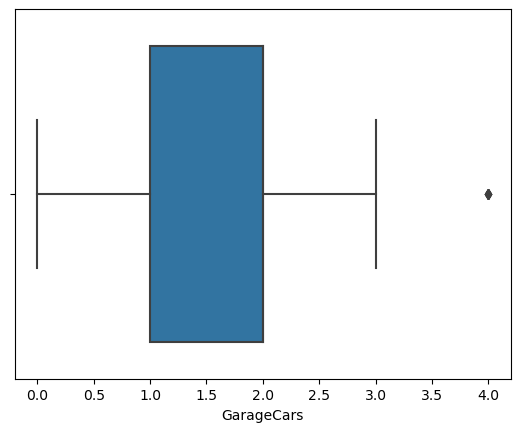

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


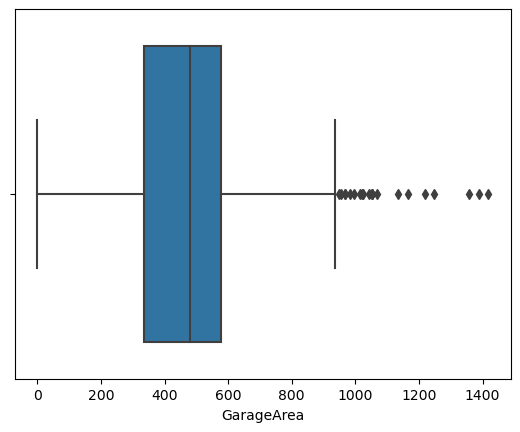

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


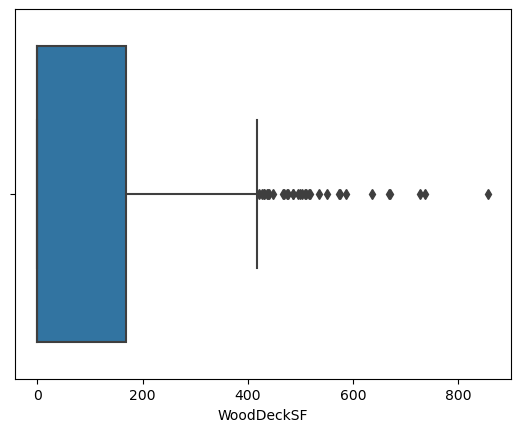

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


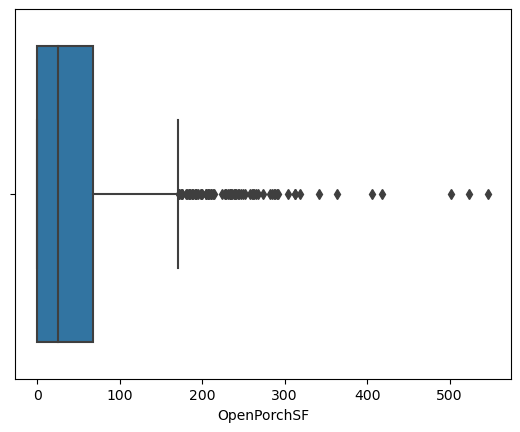

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


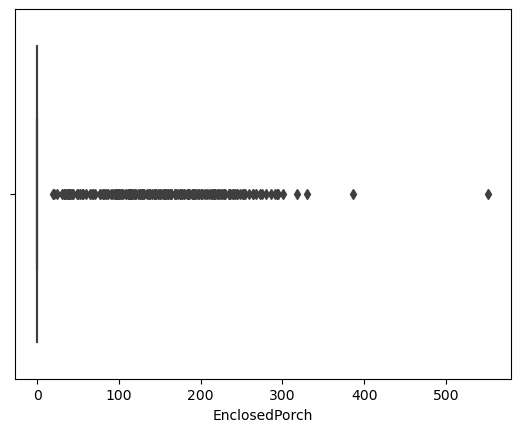

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


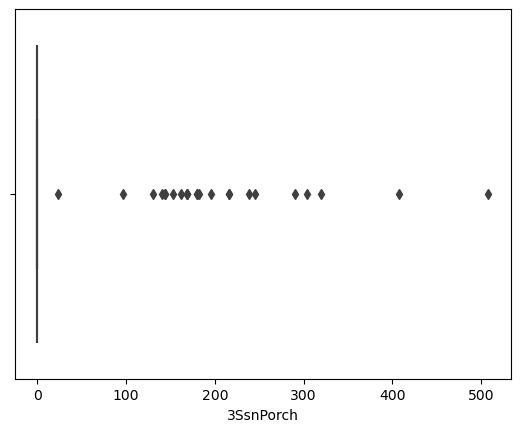

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


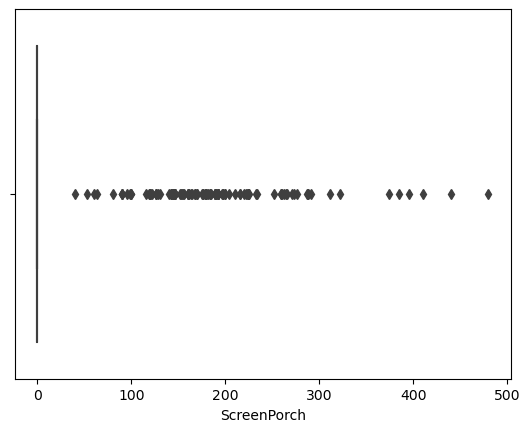

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


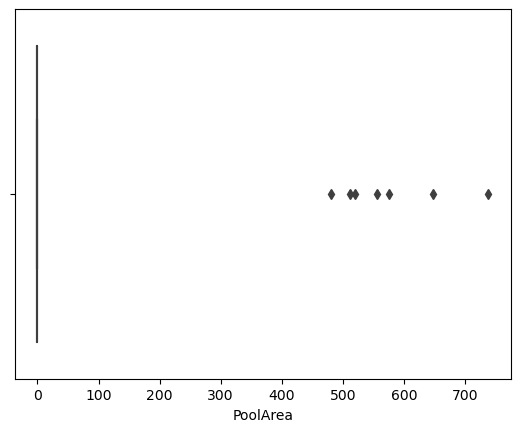

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


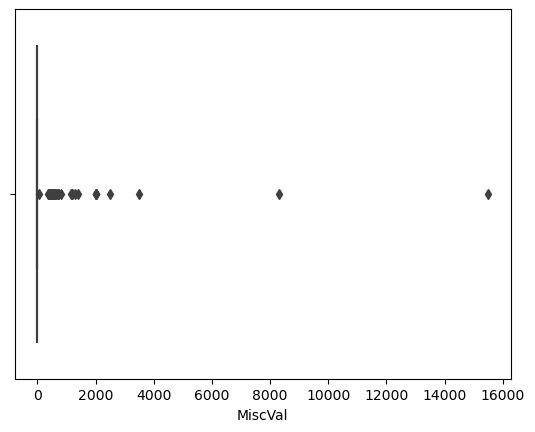

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


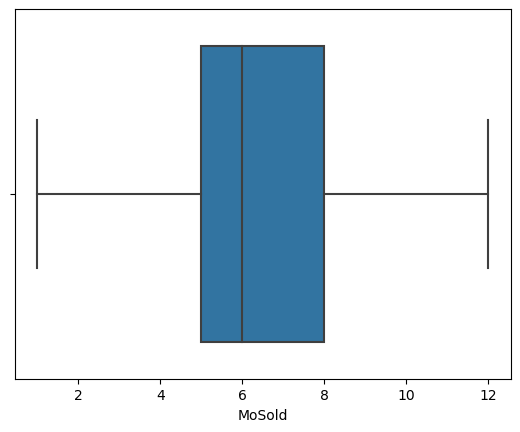

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


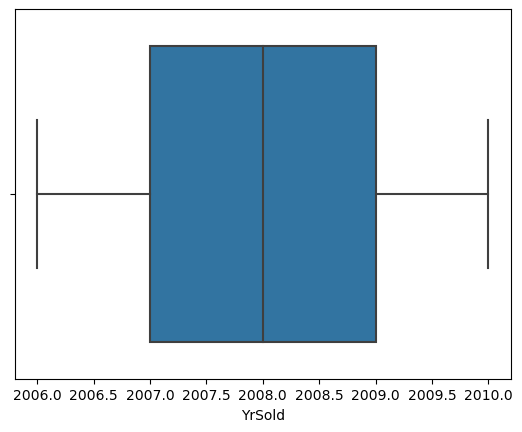

/Users/yshaik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


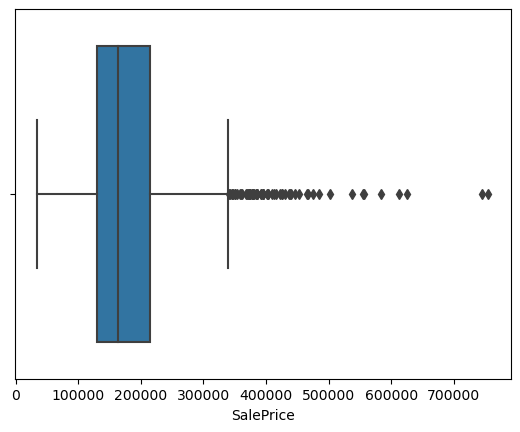

In [16]:
#Ouliers plot of all num variables
num_cols=df.columns[df.dtypes!="object"]
for i in num_cols:
     sns.boxplot(df[i])
     plt.show()

### Bivariant Analysis

Cat to cat

In [17]:
cat_cols
pd.crosstab(df["MSZoning"],df["Street"],)

Street,Grvl,Pave
MSZoning,,
C (all),2,8
FV,0,65
RH,0,16
RL,3,1148
RM,1,217


        A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

####################################Cat to num####################################################

In [18]:
#SalePrice,Exterior1st,YearBuilt


df.groupby(["Exterior1st"]).agg(({"SalePrice":["min","max"]})) 

SalePrice        
                  min     max
Exterior1st                  
AsbShng         35311  165500
AsphShn        100000  100000
BrkComm         60000   82000
BrkFace         40000  430000
CBlock         105000  105000
CemntBd         75000  556581
HdBoard         83000  755000
ImStucc        262000  262000
MetalSd         62383  392000
Plywood         82500  345000
Stone          230000  287000
Stucco          58500  381000
VinylSd         37900  611657
Wd Sdng         34900  745000
WdShing         87000  385000

######################################Num to Num#########################################

In [19]:
print(df.groupby(["YearBuilt"]).agg(({"SalePrice":["min","max"]}))) # year built max and min sales
df.groupby(["YrSold"]).agg(({"SalePrice":["min","max"]})) # year wise max and min sales

          SalePrice        
                min     max
YearBuilt                  
1872         122000  122000
1875          94000   94000
1880         117500  295000
1882         168000  168000
1885         100000  122500
...             ...     ...
2006          84500  465000
2007         146000  426000
2008         160000  582933
2009         164500  611657
2010         394432  394432

[112 rows x 2 columns]


SalePrice        
             min     max
YrSold                  
2006       35311  625000
2007       39300  755000
2008       40000  446261
2009       34900  582933
2010       55000  611657

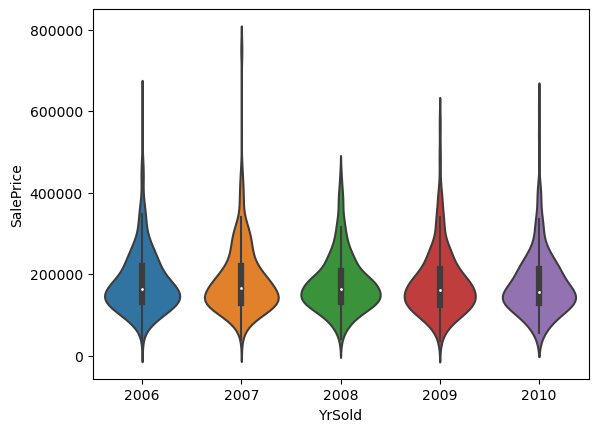

In [20]:
sns.violinplot(data=df,x="YrSold",y="SalePrice")
plt.show()


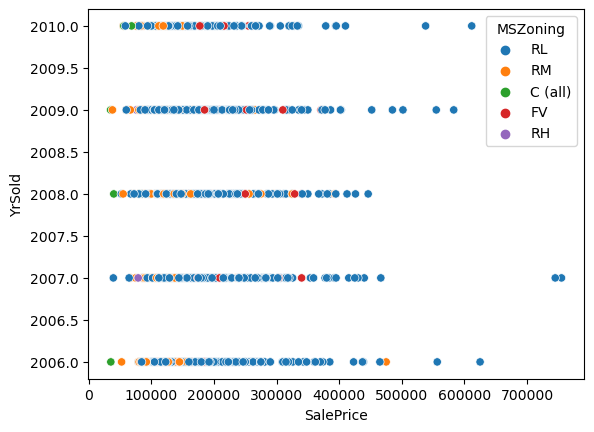

In [21]:
sns.scatterplot(data=df,x="SalePrice",y="YrSold",hue="MSZoning")
plt.show()



In [22]:
df.corr()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [23]:
d=df.corr()
z=[]
print(type(z))
for i in d:
    for j in d[i]:
        if j>0.6 and j!=1:
            z.append((i,j))

print(z)

<class 'list'>
[('OverallQual', 0.6006707165907149), ('OverallQual', 0.7909816005838053), ('YearBuilt', 0.8256674841743408), ('YearRemodAdd', 0.6422767797035356), ('BsmtFinSF1', 0.6492117535742649), ('TotalBsmtSF', 0.8195299750050339), ('TotalBsmtSF', 0.6135805515591943), ('1stFlrSF', 0.8195299750050339), ('1stFlrSF', 0.6058521846919153), ('2ndFlrSF', 0.6875010641666033), ('2ndFlrSF', 0.6097073002717436), ('2ndFlrSF', 0.6164226354915431), ('GrLivArea', 0.6875010641666033), ('GrLivArea', 0.6300116462511148), ('GrLivArea', 0.8254893743088425), ('GrLivArea', 0.7086244776126515), ('BsmtFullBath', 0.6492117535742649), ('FullBath', 0.6300116462511148), ('HalfBath', 0.6097073002717436), ('BedroomAbvGr', 0.676619935742649), ('TotRmsAbvGrd', 0.6164226354915431), ('TotRmsAbvGrd', 0.8254893743088425), ('TotRmsAbvGrd', 0.676619935742649), ('GarageYrBlt', 0.8256674841743408), ('GarageYrBlt', 0.6422767797035356), ('GarageCars', 0.6006707165907149), ('GarageCars', 0.882475414281462), ('GarageCars', 0

from above data we see that "SalePrice" has strong relationship with OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

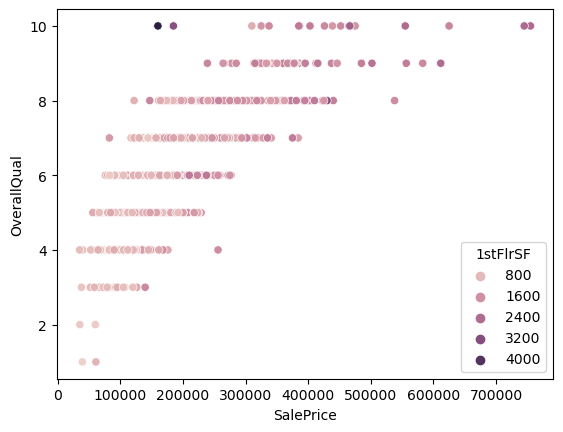

In [24]:
sns.scatterplot(data=df,x="SalePrice",y="OverallQual",hue="1stFlrSF")

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

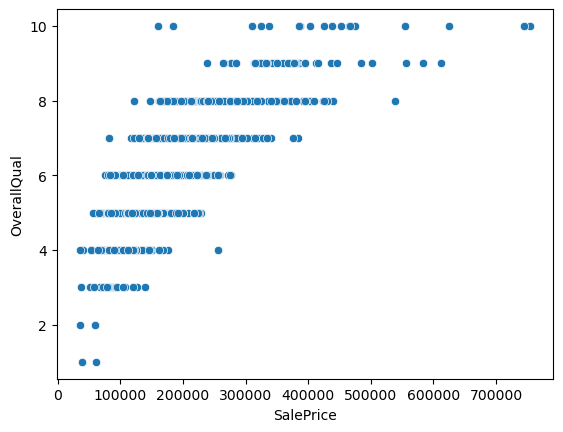

In [25]:
sns.scatterplot(data=df,x="SalePrice",y="OverallQual")

####Feature Engineering


Handelling Null values

In [26]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [27]:
col_cat_null=[]
col_num_null=[]
'''
for i in df.columns:
    if (df[i].isnull().sum())!=0 :
                print(i,":",df[i].isnull().sum())
                col_null.append(i)

'''
# CATEGORY variables with null values
for i in cat_cols:
    if (df[i].isnull().sum())!=0 :
                print(i,":",df[i].isnull().sum())
                col_cat_null.append(i)
print("##################################################################")
# NUM variables with null values
for i in num_cols:
    if (df[i].isnull().sum())!=0 :
                print(i,":",df[i].isnull().sum())
                col_num_null.append(i)

Alley : 1369
MasVnrType : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406
##################################################################
LotFrontage : 259
MasVnrArea : 8
GarageYrBlt : 81


In [28]:
#MiscFeature,Alley,PoolQC have many nulls more than 90% we can delete these two rows
#df1=df

df1.drop(columns=["MiscFeature","Alley","PoolQC"],inplace=True)
print(df.shape)

print(df1.shape)


cat_cols=df1.columns[df1.dtypes=="object"]



col_cat_null=[]


for i in cat_cols:
    if (df1[i].isnull().sum())!=0 :
                print(i,":",df1[i].isnull().sum())
                col_cat_null.append(i)
print(col_cat_null)



(1460, 77)
(1460, 77)
MasVnrType : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
Fence : 1179
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']


In [29]:

df1["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)
df1["MasVnrArea"].fillna(df["MasVnrArea"].mean(),inplace=True)
df1["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(),inplace=True)





In [30]:
col_num_null=[]

for i in num_cols:
    if (df[i].isnull().sum())!=0 :
                print(i,":",df[i].isnull().sum())
                col_num_null.append(i)
col_num_null

[]

In [31]:
df1.fillna("others",inplace=True)

col_cat_null =[]    
for i in cat_cols:
    if (df1[i].isnull().sum())!=0 :
                print(i,":",df1[i].isnull().sum())
                col_cat_null.append(i)


col_cat_null

[]

In [32]:
df1["MasVnrType"].isnull().sum()

0

In [33]:
df1["LotFrontage"].isnull().sum()

0

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

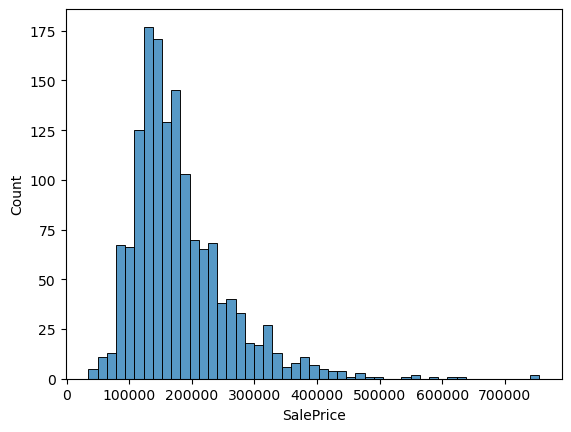

In [34]:
sns.histplot(df1["SalePrice"])

### Treating Outliers

In [35]:
df1.describe([0.01,0.02,0.03,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
2%,20.000000,24.000000,2124.740000,4.000000,3.000000,1908.360000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,79000.000000
3%,20.000000,30.000000,2522.000000,4.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,82000.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
93%,154.800000,98.870000,15869.350000,8.000000,7.000000,2006.000000,2007.000000,390.610000,1199.740000,263.220000,...,300.870000,153.740000,147.610000,0.000000,118.610000,0.000000,0.000000,11.000000,2010.000000,311305.000000
94%,160.000000,100.000000,16551.900000,8.000000,8.000000,2007.000000,2007.000000,425.000000,1225.060000,334.920000,...,316.000000,163.840000,162.920000,0.000000,142.460000,0.000000,0.000000,11.000000,2010.000000,318028.060000


In [36]:
num_cols=df1.columns[df1.dtypes!="object"]
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [37]:
df1.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,others,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,others,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,others,0,9,2008,WD,Normal,223500


In [38]:
#To find outliers
out=[]
for i in num_cols:
    q1=np.percentile(df1[i],1)
    q3=np.percentile(df1[i],98)
    for j in df[i]:
        #print(i,q1,q3)
        if j>q3 or j<q1:
            #print(i,j,q1,q3)
            pass


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

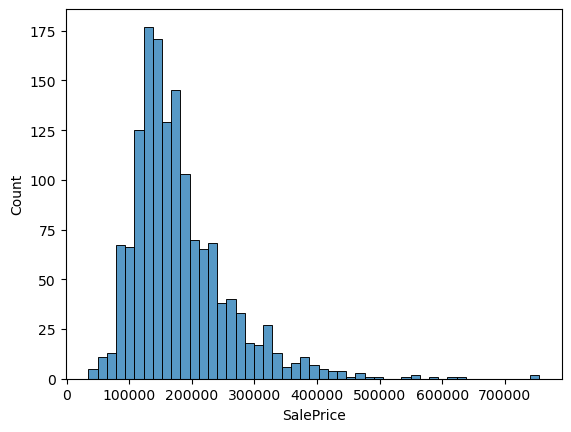

In [39]:
sns.histplot(df1["SalePrice"])

In [40]:
for i in num_cols:
    q1=np.percentile(df1[i],1)
    q3=np.percentile(df1[i],98)
        #print(i,":",q1,",",q3)
    df1[i]=np.where(df1[i]>q3, q3, df1[i])
    df1[i]=np.where(df1[i]<q1, q1, df1[i])


                
    

In [41]:
#To find outliers
out=[]
for i in num_cols:
    q1=np.percentile(df1[i],1)
    q3=np.percentile(df1[i],98)
    for j in df[i]:
        #print(i,q1,q3)
        if j>q3 and j<q1:
            out.append(j)
            
print("Outliers:",out)


Outliers: []


###########################Converting cat variables to num for implementing the model###########

In [42]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
cat_cols=df.columns[df.dtypes=="object"]

for i in cat_cols:
    print("\n",df[i].value_counts())


 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 Pave    1454
Grvl       6
Name: Street, dtype: int64

 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

 Norm      1260
Feedr   

In [44]:
540/1460

0.3698630136986301

In [45]:
#dropping columns LotFrontage,GarageYrBlt,MasVnrArea,Neighborhood
df1.drop(columns=["LotFrontage","GarageYrBlt","MasVnrArea","Neighborhood"], inplace=True)

In [46]:
cat_cols=df1.columns[df1.dtypes=="object"]
cat_cols


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
df2=pd.get_dummies(df1,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],drop_first=True)
df2.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
df2.columns[df2.dtypes=="object"]



Index([], dtype='object')

##########################Implementing the model ######################################

In [49]:
df2["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

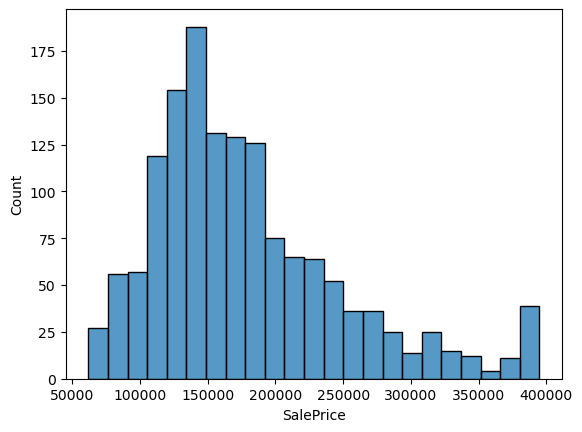

In [50]:
#1.Target variable is normally distributed??
sns.histplot(df2["SalePrice"])
plt.show()

In [51]:
#Shapiro test
from scipy import stats
stats.shapiro(df2["SalePrice"])


ShapiroResult(statistic=0.9170727729797363, pvalue=1.4690440873891796e-27)

In [52]:
stats.shapiro(np.sqrt(df2["SalePrice"]))

ShapiroResult(statistic=0.9674695134162903, pvalue=1.3132726377753243e-17)

In [53]:
stats.shapiro(np.log10(df1["SalePrice"]))

ShapiroResult(statistic=0.9912073016166687, pvalue=1.1500570451516978e-07)

In [54]:
stats.shapiro(np.log1p(df1["SalePrice"]))

ShapiroResult(statistic=0.9912068247795105, pvalue=1.1492292628645373e-07)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

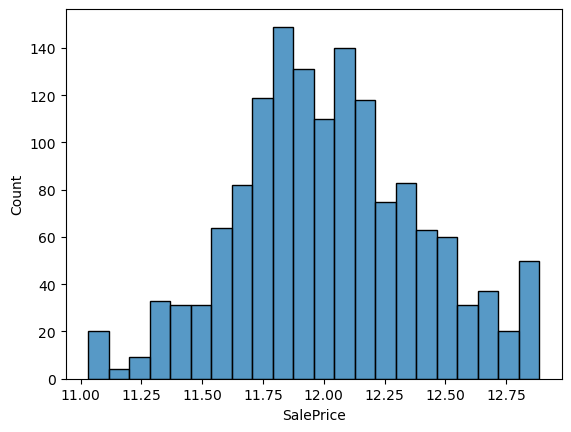

In [55]:
sns.histplot(np.log1p(df1["SalePrice"]))  #This is much better normalized cur

In [56]:
df2["SalePriceNew"]=np.log1p(df1["SalePrice"])

In [57]:
df2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceNew
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,1,0,12.247699
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,1,0,12.109016
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,1,0,12.317171
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0,0,0,1,0,0,0,0,0,11.849405
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,1,0,12.429220


In [58]:
df2.drop(columns=["SalePrice"],inplace=True)

In [59]:
df2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceNew
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,1,0,12.247699
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,1,0,12.109016
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,1,0,12.317171
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0,0,0,1,0,0,0,0,0,11.849405
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,1,0,12.429220


#########################Model Development###################################
1.seperate x and y

2.split data into x_train,y_train ,x_test and y_test

3.fit the model

4.Evaluate model

In [61]:
#target variable is y
y=df2["SalePriceNew"]
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePriceNew, Length: 1460, dtype: float64

In [63]:
x=df2.loc[:, df2.columns != "SalePriceNew"]

In [65]:
x.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0


In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [120]:
print(x_train.shape,y_train.shape)

(1095, 225) (1095,)


In [121]:
print(x_test.shape,y_test.shape)

(365, 225) (365,)


In [122]:
from sklearn.linear_model import LinearRegression


In [145]:
lr=LinearRegression()

In [146]:
lr.fit(x_train,y_train)  # this will learn the entire regression model

LinearRegression()

In [147]:
lr.coef_

array([ 2.96576321e-04,  6.31602892e-06,  4.55948650e-02,  4.41315612e-02,
        1.41731725e-03,  7.44527793e-04, -8.52828494e-05, -1.18739808e-04,
       -1.43954151e-04,  2.53110257e-04, -6.46538504e-06,  1.37023663e-06,
       -2.73666506e-12,  2.71824716e-04,  2.41031418e-02,  1.80942884e-02,
        1.45645159e-02, -4.06787983e-05, -3.00398968e-03, -8.97069893e-02,
        2.75053911e-04,  2.11837906e-02,  3.37867945e-02,  5.16586302e-05,
        1.07298968e-04,  1.06653444e-04,  6.91105138e-05, -4.78957585e-13,
        2.53899752e-04, -7.98666688e-14, -5.61077250e-05, -4.57045163e-04,
       -1.86072782e-03,  2.63826517e-01,  2.36991637e-01,  2.03010322e-01,
        1.39143607e-01,  9.58333243e-02, -5.65293051e-03,  9.85750845e-03,
       -1.68947607e-03,  6.61454225e-02, -3.14304637e-02,  1.52757605e-02,
        2.59514632e-14,  1.72389787e-02, -1.38299344e-02, -5.12661601e-02,
       -1.46744264e-02,  3.66418717e-02, -7.47742067e-02,  6.98543807e-02,
        1.00285903e-01,  

In [148]:
x.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=225)

In [149]:
lr.intercept_

8.348562278115635

In [150]:
lr.score(x_train,y_train)  # R^2 is 94.13 for train data

0.9413805615462565

In [151]:
lr.score(x_test,y_test)  # for test it is 85.44,difference is above 9. 
                         #so our model is over fitting(train r^2 is greater than test)

0.8544009875874361

In [152]:
#to find MSE and RMSE predict data

predict_train=lr.predict(x_train)

In [153]:
predict_train

array([12.74554715, 11.50637515, 11.96734902, ..., 11.5807506 ,
       12.28309625, 12.35489654])

In [154]:
y_train

702     12.799178
1232    11.530775
775     11.995358
930     12.211065
275     12.230770
          ...    
919     12.081082
1164    12.175619
500     11.635152
941     12.273736
421     12.278398
Name: SalePriceNew, Length: 1095, dtype: float64

In [155]:
MSE=np.mean(pow((y_train-predict_train),2)) #MeanSquareError is avg(actualvalue-predictedvalue)^2
MSE

0.008514014457498885

In [156]:
RMSE=np.sqrt(MSE)
RMSE

0.09227141733765058

In [157]:
predict_test=lr.predict(x_test)
predict_test

array([12.0062641 , 11.96955183, 11.98700038, 12.38987528, 11.65217878,
       11.76207316, 11.70153398, 12.2515309 , 12.58927323, 12.17799919,
       11.55061555, 11.87299421, 11.63648401, 11.72189505, 11.7975767 ,
       12.11828077, 11.64625133, 12.02740167, 11.14152765, 12.22887441,
       12.0039231 , 11.77464347, 12.39958943, 12.82687604, 12.45687246,
       12.24006445, 11.61319875, 12.00691373, 11.83466694, 12.12808511,
       11.90737391, 11.5076797 , 12.15616561, 12.04359083, 11.74414459,
       12.1428358 , 11.90234351, 11.945855  , 11.90449359, 12.44380421,
       11.65622784, 12.23262218, 12.45032016, 11.73348967, 11.83365879,
       12.58804069, 12.95956905, 12.21814348, 11.93854259, 11.85912696,
       11.82586741, 11.75621271, 11.83337131, 11.79084758, 11.67596012,
       12.65884908, 11.56794918, 12.25384179, 11.83190049, 12.04369251,
       11.87417869, 12.40139686, 11.8857136 , 11.63544787, 12.04534191,
       12.30028911, 11.57958486, 11.79540093, 12.47830934, 11.90

In [158]:
print("RMSE AND MSE value of test data:\n")
print(np.mean(pow((y_test-predict_test),2)),np.sqrt(np.mean(pow((y_test-predict_test),2)))) #MeanSquareError is avg(actualvalue-predictedvalue)^2



RMSE AND MSE value of test data:

0.021367959725074867 0.14617783595701117
